<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/08_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 8.5 CSV
CSV is a very common data format used to store the data. In this example, we will be using daily climate data in CSV format, and read it using *pandas* library and aggregate data at different time scale and plot it.

In [60]:
from google.colab import drive
import pandas as pd

#drive.mount("/content/gdrive")
fname = "/content/gdrive/My Drive/Colab Notebooks/LearnPython/data/DailyClimate.csv"

# we are defining index column also
df = pd.read_csv(fname, parse_dates=['date'], index_col=['date'])

We can print to see what data, the file contains:

In [61]:
print(df)

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000
...               ...        ...         ...           ...
2017-04-20  34.500000  27.500000    5.562500    998.625000
2017-04-21  34.250000  39.375000    6.962500    999.875000
2017-04-22  32.900000  40.900000    8.890000   1001.600000
2017-04-23  32.875000  27.500000    9.962500   1002.125000
2017-04-24  32.000000  27.142857   12.157143   1004.142857

[1575 rows x 4 columns]


We can print the summary of data as:

In [62]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1575 entries, 2013-01-01 to 2017-04-24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1575 non-null   float64
 1   humidity      1575 non-null   float64
 2   wind_speed    1575 non-null   float64
 3   meanpressure  1575 non-null   float64
dtypes: float64(4)
memory usage: 61.5 KB
None


We can look at the statistics of dataframe as:

In [63]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1575.000000,1575.000000,1575.000000,1575.000000
mean,25.231582,60.420115,6.903642,1010.589745
std,7.337316,16.956083,4.508803,175.298310
min,6.000000,13.428571,0.000000,-3.041667
25%,18.516667,49.750000,3.700000,1001.875000
50%,27.166667,62.380952,6.370000,1009.000000
75%,31.142857,72.125000,9.262500,1015.183333
max,38.714286,98.000000,42.220000,7679.333333


We can see the meanpressure is having some outliers. We can mark the data outside 980 -- 1100 as *np.nan*. It should be noted that identification of outliers depends upon the range of data present in the observed data and physical/possible range of data.

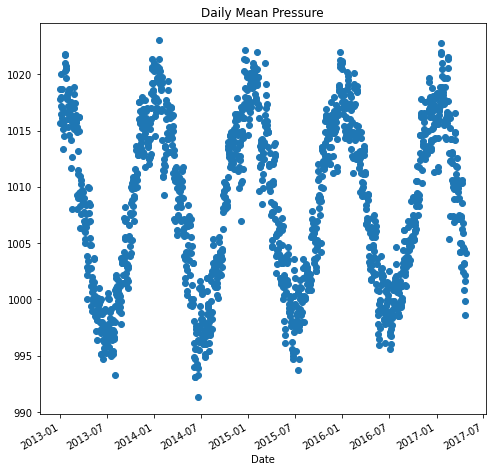

In [64]:
import matplotlib.pyplot as plt
import numpy as np

df['meanpressure'][df['meanpressure']< 980] = np.nan
df['meanpressure'][df['meanpressure']> 1100] = np.nan

fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(df.index.values, df['meanpressure'])

ax.set(xlabel="Date", title="Daily Mean Pressure")
fig.autofmt_xdate()
plt.show()

We can aggregate (resample) the data to different time scale. Let us resample our data to monthly time scale. While resampling, we can sum the data (e.g. in the case of rainfall), or take mean (e.g. temperature, humidity and other variables). 
Let us plot the monthly meanpressure data.

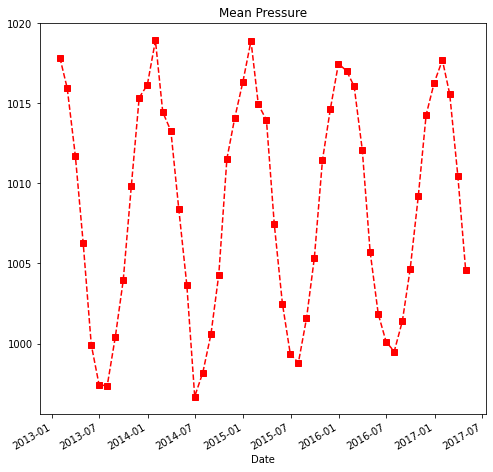

In [65]:
df_monthly = df.resample('M').mean()

fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(df_monthly.index.values, df_monthly['meanpressure'], '--rs')

ax.set(xlabel="Date", title="Mean Pressure")
fig.autofmt_xdate()
plt.show()

Let us write this monthly data.

In [66]:
fname_monthly = "/content/gdrive/My Drive/Colab Notebooks/LearnPython/data/DailyClimate1.csv"

df_monthly.to_csv(fname_monthly)